# 3.3.3 - AdaBoost - Boosting - Método Ensemble.


* En este Notebook vamos a ver los ***que es el AdaBoost*** y vamos a ***resolver un problema de clasificación usando*** la implementación de este "***meta-algoritmo***" con la ***librería de scikit-learn***.


* Vamos a tratar los siguientes puntos:
<span></span><br>
    1. [AdaBoost](#M1)
<span></span><br>
    2. [Ejemplo de Clasificación de Pacientes con Diabetes](#M2)
    <span></span><br>
        2.1. [Carga de datos](#M21)
    <span></span><br>
        2.2. [Cambio de estructura de datos a numpy y Particionado de datos en Entrenamiento y Test](#M22)
    <span></span><br>
        2.3. [Visualización de los datos](#M23)
    <span></span><br>
        2.4. [Creacción y ajuste de los modelos](#M24)
    <span></span><br>
        2.5. [Visualización de los Árboles obtenidos](#M25)
    <span></span><br>
        2.6. [Evaluación de los modelos](#M26)
    <span></span><br>
        2.7. [Conclusiones](#M27)


<hr>



## <a name="M1">1. AdaBoost</a>


* El "***AdaBoost***" es un Meta-Algoritmo de Aprendizaje (Método Ensemble) que puede ***utlizar cualquier Algoritmo de Aprendizaje (aunque siempre el mismo Algoritmo) para generar la colección de modelos***.


* El ***Algoritmo de Aprendizaje que suele utilizar por defecto el AdaBoost son los CART*** *\[Classification And Regression Trees\]* para generar la ***colección de modelos***.


* El AdaBoost (los métodos de Boosting) ***empezarán entrenando un primer modelo*** con todo el Dataset de entrenamiento y una vez entrenado se ***calculará su precisión y los elementos que clasifica correctamente y erroneamente***. Posteriormente cogerá el primer modelo y lo ***volverá a entrenar con todo el Dataset de entrenamiento pero dando mayor peso a los elementos que previante clasificó de manera erronea***. Seguirá cogiendo el último modelo entrenado y realizará el mismo proceso repetidamente hasta que se dé una condición de parada; como por ejemplo, que se hayan creado 'N' modelos.


* La ***predicción final se realizará por votación ponderada***; es decir, cada modelo emitirá su predicción de manera individual y la predicción final será la predicción más emitida por todos los modelos ponderada por la precisión del modelo.


<hr>


## <a name="M2">2. Ejemplo de Clasificación de Pacientes con Diabetes</a>

* En el siguiente ejemplo vamos a Clasificar a las personas en Diabéticas y no Diabéticas en función de una serie de variables usando el ***AdaBoost*** implementado en la librería de Scikit-Learn:


* Para resolver el problema de Clasificación vamos a utilizar la clase **"AdaBoostClassifier()"**, cuya documentación esta en el siguiente enlace:<br>https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html


* Como puede observarse la clase "AdaBoostClassifier()" es una implementación del *AdaBoost* para resolver problemas de clasificación utilizando por defecto los Arboles de Decisión para generar modelos destinados a resolver problemas de clasificación. Para la resolución de problemas de Regresión existe la clase *AdaBoostRegressor()* que se menciona en este punto a modo informativo.


* El **"AdaBoostClassifier()"** acepta una serie de parámetros destacando los siguientes:
<span></span><br><br>
    + ***n_estimators***: Numero máximo de modelos (arboles de decisión por defecto) a generar.
<span></span><br><br>
    + ***base_estimator***: Se le indica el Algoritmo de Aprendizaje a utilizar. Por defecto utiliza un CART que genera un modelo con 1 nivel de profundidad.
    
    
* Para realizar esta clasificación vamos a tener las siguientes variables de los pacientes:

    - ***Pregnancies***: Number of times pregnant
    - ***GlucosePlasma***: glucose concentration
    - ***BloodPressure***: Diastolic blood pressure
    - ***SkinThickness***: Triceps skin fold thickness
    - ***Insulin***: 2-Hour serum insulin
    - ***BMI***: Body mass index 
    - ***DiabetesPedigreeFunction***: Diabetes pedigree function
    - ***Age***: Age
    - ***OutcomeClass***: variable (0 or 1) 268 of 768 are 1, the others are 0


* Para resolver este problema vamos a realizar los siguientes pasos:
<span></span><br>
    2.1. [Carga de datos](#M21)
<span></span><br>
    2.2. [Cambio de estructura de datos a numpy y Particionado de datos en Entrenamiento y Test](#M22)
<span></span><br>
    2.3. [Visualización de los datos](#M23)
<span></span><br>
    2.4. [Creacción y ajuste de los modelos](#M24)
<span></span><br>
    2.5. [Visualización de los Árboles obtenidos](#M25)
<span></span><br>
    2.6. [Evaluación de los modelos](#M26)
<span></span><br>
    2.7. [Conclusiones](#M27)


* En primer lugar vamos a importar las librería necesarias:

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import pydotplus
import collections

from IPython.display import Image

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.tree import export_graphviz
%matplotlib inline 

<hr>


### <a name="M21">2.1. Carga de datos</a>

* El primer paso que vamos a realizar es el de cargar los datos que los tenemos en el siguiente fichero:
    - ***DataSet***: "../../data/diabetes.csv"

In [2]:
df = pd.read_csv("../../data/diabetes.csv")
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
535,4,132,0,0,0,32.9,0.302,23,1
743,9,140,94,0,0,32.7,0.734,45,1
257,2,114,68,22,0,28.7,0.092,25,0
537,0,57,60,0,0,21.7,0.735,67,0
11,10,168,74,0,0,38.0,0.537,34,1


<hr>

### <a name="M22">2.2. Cambio de estructura de datos a numpy y Particionado de datos en Entrenamiento y Test</a>


In [3]:
# Paso a Numpy
x_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
              'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = df[x_features].values
y = df['Outcome'].values 

# División de datos en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

<hr>


### <a name="M23">2.3. Visualización de los datos</a>


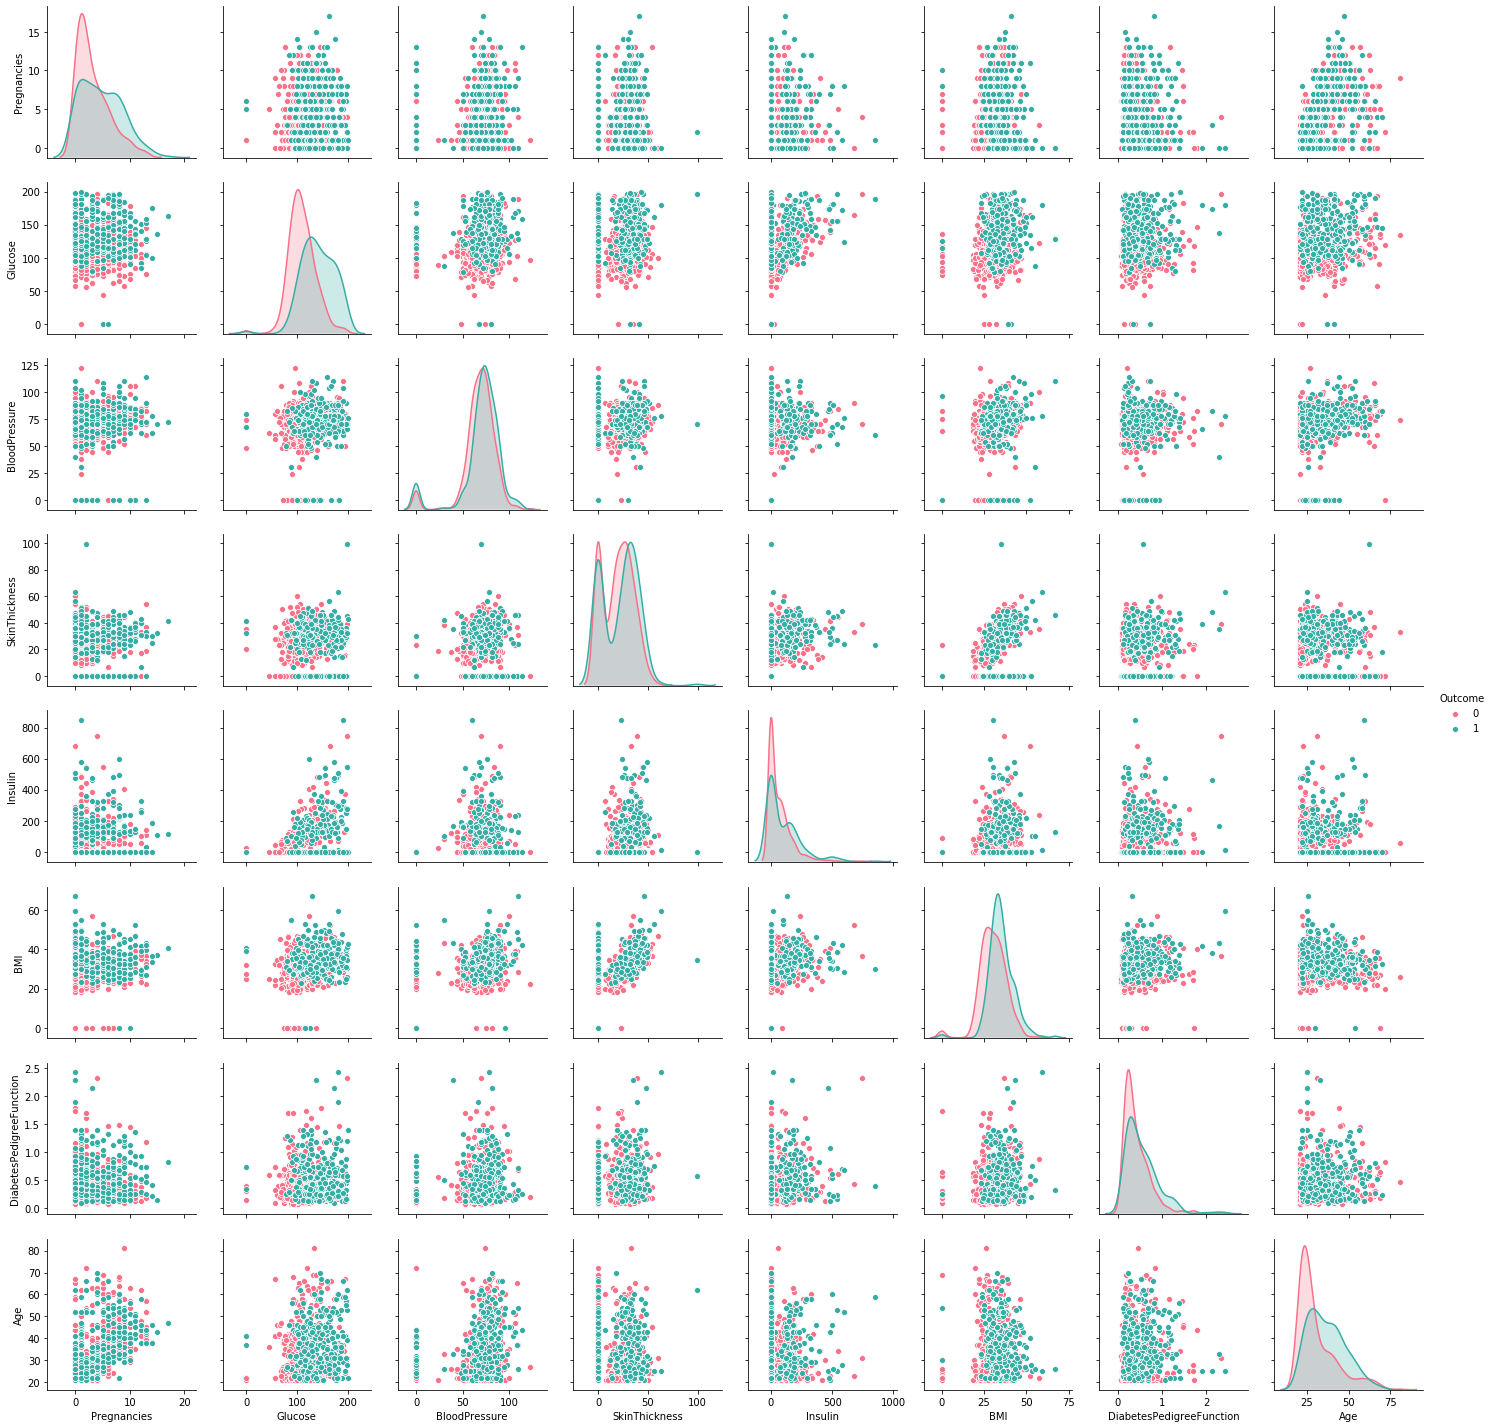

In [4]:
sns.pairplot(df, hue="Outcome", palette="husl", vars=x_features)

<hr>


### <a name="M24">2.4. Creacción y ajuste de los modelos</a>


* Al tratarse de un ejemplo con fines didácticos vamos a crear una colección de modelos con solo 4 árboles de decisión.


* Esto se hace así para poder ver como el AdaBoost crear una colección de modelos independientes y para ver de forma visual como quedan los árboles de decisión (de ahí que solo tengan una profundidad de 3 niveles).


* Al constructor del *AdaBoostClassifier()* vamos a pasarle como parámetro un *DecisionTreeClassifier()* con un nivel de profundidad de 3 ya que si no lo indicamos, utilizara el *DecisionTreeClassifier()* con 1 nivel de profundidad que es la configuración por defecto.


* Cuando se trabaje en un problema real se debería de crear una colección de modelos con bastantes más modelos para obtener mejores resultados de los que vamos a obtener en este ejemplo y también seria interesante estudiar la complejidad de los modelos individuales creados.

In [5]:
abc =AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3, criterion='gini'), 
                        n_estimators=4, 
                        random_state=0)
abc.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=3,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

<hr>


### <a name="M25">2.5. Visualización de los Árboles obtenidos</a>


* Una vez creada la colección de los arboles de decisión, vamos a visualizarlos para ver que decisiones toman cada uno de ellos por separado en función del valor de las variables.


* En primer lugar vamos a obtener la lista de modelos:

In [6]:
models = abc.estimators_
models

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                        max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=209652396, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                        max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=398764591, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                        max_features=None, max_leaf_nodes=None,
                        min_impuri

* Pasamos a pintar cada uno de los 4 árboles:

In [7]:
def graph_tree(model, feature_names, class_names):
    """
    Función que crea el gráfico del arbol de decisión
    model: modelo del árbol de decisión
    feature_names: lista con el nombre de las variables de entrada
    class_names: lista con el nombre de las clases
    """
    dot_data = export_graphviz(model, feature_names=feature_names, class_names=class_names, 
                               out_file=None, filled=True, rounded=True)
    
    graph = pydotplus.graph_from_dot_data(dot_data)

    edges = collections.defaultdict(list)

    for edge in graph.get_edge_list():
        edges[edge.get_source()].append(int(edge.get_destination()))

    for edge in edges:
        edges[edge].sort()    
        for i in range(2):
            dest = graph.get_node(str(edges[edge][i]))[0]

    return graph

Arbol de Decisión 1


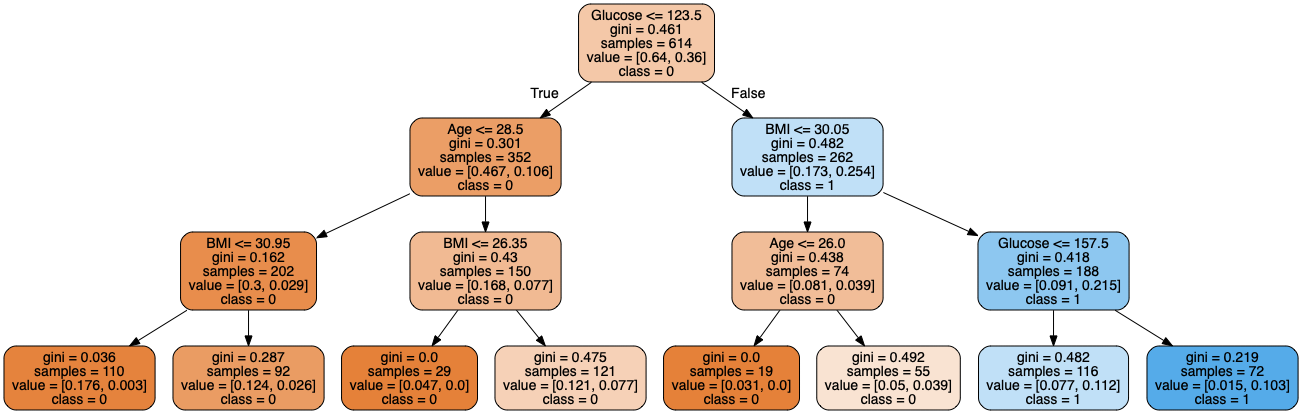

In [8]:
print("Arbol de Decisión 1")
graph = graph_tree(model=models[0], feature_names=x_features, class_names=['0', '1'])
Image(graph.create_png())

Arbol de Decisión 2


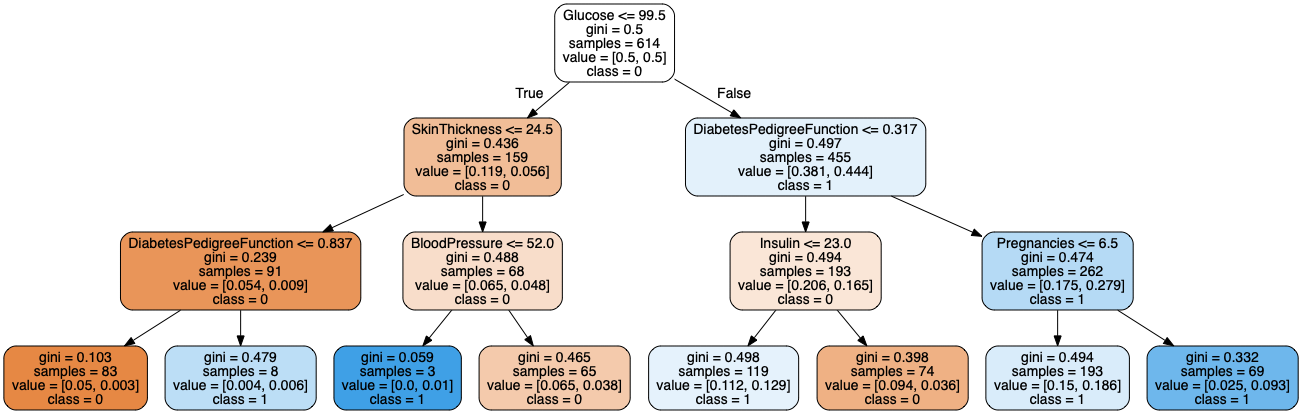

In [9]:
print("Arbol de Decisión 2")
graph = graph_tree(model=models[1], feature_names=x_features, class_names=['0', '1'])
Image(graph.create_png())

Arbol de Decisión 3


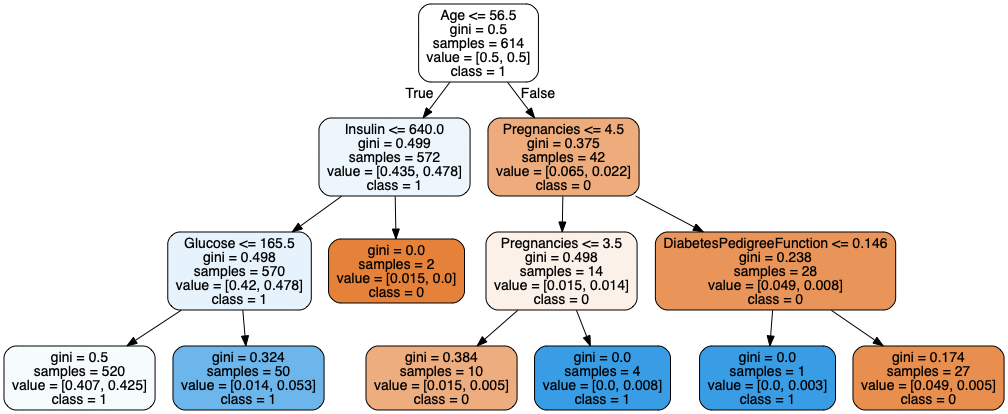

In [10]:
print("Arbol de Decisión 3")
graph = graph_tree(model=models[2], feature_names=x_features, class_names=['0', '1'])
Image(graph.create_png())

Arbol de Decisión 4


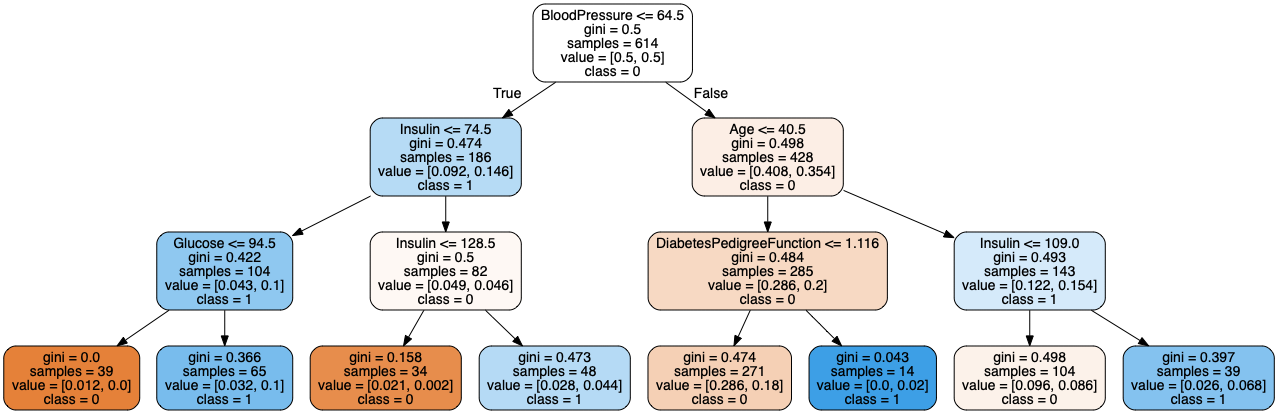

In [11]:
print("Arbol de Decisión 4")
graph = graph_tree(model=models[3], feature_names=x_features, class_names=['0', '1'])
Image(graph.create_png())

<hr>


### <a name="M26">2.6. Evaluación de los modelos</a>

* Para cada uno de los árboles de la colección y para el AdaBoost vamos a calcular las siguientes métricas de evaluación:

    + Accuracy
    + F1
    + Precision
    + Recall
    + AUC_ROC

In [12]:
def evaluation(model, name, X_train, y_train, X_test, y_test):
    """
    Función de devuelve en un diccionario las métricas de evaluación de 
    Accuracy, Precision, Recall, F1 y AUC_ROC para los conjuntos de datos de entrenamiento y test
        model: modelo a evaluar
        name: nombre del modelo
        X_train: Variables de entrada del conjunto de datos de entrenamiento
        y_train: Variable de salida del conjunto de datos de entrenamiento
        X_test: Variables de entrada del conjunto de datos de test
        y_test: Variable de salida del conjunto de datos de test
        return: diccionario con el nombre del modelo y el valor de las métricas
    """
    model_dict = {}
    model_dict['name'] = name
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    y_prob_train = model.predict_proba(X_train)
    y_prob_test = model.predict_proba(X_test)
    model_dict['accuracy_train'] = accuracy_score(y_true=y_train, y_pred=y_pred_train)
    model_dict['accuracy_tests'] = accuracy_score(y_true=y_test, y_pred=y_pred_test)
    model_dict['precision_train'] = precision_score(y_true=y_train, y_pred=y_pred_train)
    model_dict['precision_tests'] = precision_score(y_true=y_test, y_pred=y_pred_test)
    model_dict['recall_train'] = recall_score(y_true=y_train, y_pred=y_pred_train)
    model_dict['recall_tests'] = recall_score(y_true=y_test, y_pred=y_pred_test)
    model_dict['f1_train'] = f1_score(y_true=y_train, y_pred=y_pred_train)
    model_dict['f1_tests'] = f1_score(y_true=y_test, y_pred=y_pred_test)
    model_dict['auc_roc_train'] = roc_auc_score(y_true=y_train, y_score=y_prob_train[:, 1])
    model_dict['auc_roc_tests'] = roc_auc_score(y_true=y_test, y_score=y_prob_test[:, 1])
    
    return model_dict


# Lista de diccionarios para guardar los resultados de la evaluación de los modelos
evaluacion = list()

# Calculamos las métricas del AdaBoost y lo añadimos a la lista
evaluacion.append(evaluation(model=abc, name='AdaBoost', 
                             X_train=X_train, y_train=y_train, 
                             X_test=X_test, y_test=y_test))

# Calculamos las métricas de los modelos por separado
for index, model in enumerate(abc.estimators_):
    evaluacion.append(evaluation(model=model, name='CART {}'.format(index + 1), 
                             X_train=X_train, y_train=y_train, 
                             X_test=X_test, y_test=y_test))

# Pasamos los resultados a un DataFrame para visualizarlos mejor
df = pd.DataFrame.from_dict(evaluacion)
df.set_index("name", inplace=True)
df

,accuracy_train,accuracy_tests,precision_train,precision_tests,recall_train,recall_tests,f1_train,f1_tests,auc_roc_train,auc_roc_tests
name,,,,,,,,,,
AdaBoost,0.824104,0.785714,0.762791,0.634615,0.742081,0.702128,0.752294,0.666667,0.914493,0.831179
CART 1,0.763844,0.759740,0.702128,0.631579,0.597285,0.510638,0.645477,0.564706,0.840696,0.801054
CART 2,0.623779,0.558442,0.487245,0.396040,0.864253,0.851064,0.623165,0.540541,0.733037,0.705110
CART 3,0.390879,0.331169,0.366957,0.313333,0.954751,1.000000,0.530151,0.477157,0.620071,0.657586
CART 4,0.675896,0.636364,0.566265,0.400000,0.425339,0.382979,0.485788,0.391304,0.700269,0.605786


* A continuación mostramos la matriz de confusión del Random Forest para los datos de entrenamiento y test

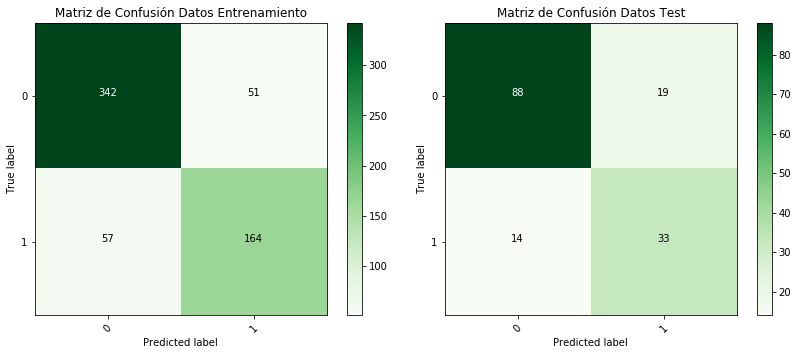

In [13]:
# Definimos el heatmap de la matriz de confusión
def plot_confusion_matrix(cm, classes, title, cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Obtenemos las matrices de confusión
cfm_train = confusion_matrix(y_true=y_train, y_pred=abc.predict(X_train))
cfm_test = confusion_matrix(y_true=y_test, y_pred=abc.predict(X_test))

# Pintamos las matrices de confusión
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plot_confusion_matrix(cfm_train, classes=['0', '1'], title='Matriz de Confusión Datos Entrenamiento')
plt.subplot(1, 2, 2)
plot_confusion_matrix(cfm_test, classes=['0', '1'], title='Matriz de Confusión Datos Test')
plt.show()

<hr>


### <a name="M27">2.7. Conclusiones</a>


* Podemos observar que pese a crear el AdaBoost una colección de solo 4 modelos, la predicción agregada de los 4 modelos independientes devuelve unos resultados en general mejores que lo obtenidos por cada unos de los modelos por separado.


* Podemos observar que los modelos individuales que genera el *AdaBoost* no tienen en su evaluación (accuracy, precision, recall, etc.) unos resultados más o menos similares como ocurre con los métodos de bagging (como por ejemplo el *Random Forest*). Esto es debido a que una vez generado el primer modelo, pasa a construir un segundo modelo partiendo del primero y teniendo en mayor consideración los elementos mal clasificados del primer modelo, de ahí que sucesivos modelos puedan tener peor rendimiento sobre todo el Dataset clasificando mal elementos que el primer modelo habia clasificado bien, pero clasificando bien elementos que el primer modelo habia clasificado mal.


* Lo importante es que la predicción final sea buena aunque haya modelo que tengan un acierto muy bajo, habrá otros muchos más modelos que tengan un acierto alto y compensen los errores cometidos por otros modelos.


* Quedaría pendiente revisar la complejidad (número de niveles) de los árboles de decisión de la colección para tener un error similar con los datos de entrenamiento y test, aunque los resultados que hemos obtenido en el ejercicio son bastante similares (resultados de entrenamien y test).

<hr>


Este Notebook ha sido desarrollado por **Ricardo Moya García** y registrado en Safe Creative como ***Atribución-NoComercial-CompartirIgual***.


<img src="../../imgs/CC_BY-NC-SA.png" alt="CC BY-NC">